In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [50]:
df = pd.read_csv('train_1.csv', sep=';', error_bad_lines=False)

In [51]:
df.head()

,ID,PROD_TYPE,TRANS_DTTM,MCC_CODE,SUM_TRANS,LOCATION_NAME
0,500000001271933224,1,31.10.2021 16:04:58,5411,"411,45",VERNYJ 1263\5A GORKOGO STR\SERPUKHOV\142203 ...
1,500000001089710588,2,20.08.2021 18:00:39,7311,503,AVITO\7 LESNAYA STR\MOSCOW\125196 RUSRUS
2,500000000004725733,1,31.10.2021 7:28:47,5411,"119,24",STOLITSA\14 POBEDY PR-T\KOMSOM-NA-AMU\681029 ...
3,500000000608267511,2,31.10.2021 16:03:14,5411,"249,95",VERNYJ 1361\2 MIRA STR\RAMENSKOE\140105 RUSRUS
4,500000001639102687,1,29.10.2021 13:13:50,5814,290,RESTORAN MGRILLCAFE.\LEVAYA STORONA 423-J KM A...


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12845075 entries, 0 to 12845074
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   ID             int64 
 1   PROD_TYPE      int64 
 2   TRANS_DTTM     object
 3   MCC_CODE       int64 
 4   SUM_TRANS      object
 5   LOCATION_NAME  object
dtypes: int64(3), object(3)
memory usage: 588.0+ MB


In [53]:
df["SUM_TRANS"]=df["SUM_TRANS"].str.replace(',','.')

In [54]:
df['SUM_TRANS'] = df['SUM_TRANS'].astype('float64')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12845075 entries, 0 to 12845074
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ID             int64  
 1   PROD_TYPE      int64  
 2   TRANS_DTTM     object 
 3   MCC_CODE       int64  
 4   SUM_TRANS      float64
 5   LOCATION_NAME  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 588.0+ MB


In [56]:
df['LOCATION_NAME'] = df['LOCATION_NAME'].astype('str')

In [57]:
df['index']=df['LOCATION_NAME'].str.extract(r'(\b\d{6}\b)', expand=False)

In [58]:
df = df.dropna()

In [62]:
df['index'] = df['index'].astype('int64')

In [63]:
df.drop('LOCATION_NAME', axis=1, inplace=True)

KeyError: "['LOCATION_NAME'] not found in axis"

In [64]:
df.head()

,ID,PROD_TYPE,TRANS_DTTM,MCC_CODE,SUM_TRANS,index
0,500000001271933224,1,31.10.2021 16:04:58,5411,411.45,142203
1,500000001089710588,2,20.08.2021 18:00:39,7311,503.00,125196
2,500000000004725733,1,31.10.2021 7:28:47,5411,119.24,681029
3,500000000608267511,2,31.10.2021 16:03:14,5411,249.95,140105
4,500000001639102687,1,29.10.2021 13:13:50,5814,290.00,174350


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2201434 entries, 0 to 2272490
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ID          int64  
 1   PROD_TYPE   int64  
 2   TRANS_DTTM  object 
 3   MCC_CODE    int64  
 4   SUM_TRANS   float64
 5   index       int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 117.6+ MB


In [66]:
df.shape

(2201434, 6)

In [67]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2201434 entries, 0 to 2272490
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   ID         int64  
 1   PROD_TYPE  int64  
 2   MCC_CODE   int64  
 3   SUM_TRANS  float64
 4   index      int64  
dtypes: float64(1), int64(4)
memory usage: 100.8 MB


In [118]:
from functools import partial
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="Session")

geocode = partial(geolocator.geocode, language="ru")
if geolocator.geocode(649791).latitude is np.nan:
    print(0)
else:
    print(geolocator.geocode(142203).latitude)
df['lat']= df["index"].apply( lambda x: None if geolocator.geocode('x').latitude is None else geolocator.geocode(x).latitude )
df['lon']= df['index'].apply( lambda x: None if geolocator.geocode('x').longitude is None else geolocator.geocode(x).longitude )

54.924159242857144


AttributeError: 'NoneType' object has no attribute 'latitude'

In [70]:
df.head()

,ID,PROD_TYPE,TRANS_DTTM,MCC_CODE,SUM_TRANS,index
0,500000001271933224,1,31.10.2021 16:04:58,5411,411.45,142203
1,500000001089710588,2,20.08.2021 18:00:39,7311,503.00,125196
2,500000000004725733,1,31.10.2021 7:28:47,5411,119.24,681029
3,500000000608267511,2,31.10.2021 16:03:14,5411,249.95,140105
4,500000001639102687,1,29.10.2021 13:13:50,5814,290.00,174350


In [71]:
df.drop('TRANS_DTTM', axis = 1, inplace = True)

In [72]:
df.head()

,ID,PROD_TYPE,MCC_CODE,SUM_TRANS,index
0,500000001271933224,1,5411,411.45,142203
1,500000001089710588,2,7311,503.00,125196
2,500000000004725733,1,5411,119.24,681029
3,500000000608267511,2,5411,249.95,140105
4,500000001639102687,1,5814,290.00,174350


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2201434 entries, 0 to 2272490
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   ID         int64  
 1   PROD_TYPE  int64  
 2   MCC_CODE   int64  
 3   SUM_TRANS  float64
 4   index      int64  
dtypes: float64(1), int64(4)
memory usage: 100.8 MB


In [76]:
df2 = pd.read_csv('train_2.csv', sep=';')

In [77]:
df2.head()

,ID,MM_IN_BANK,MM_W_CARD,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,DEPENDANT_CNT,INCOME_MAIN_AMT,REG_CODE
0,500000000000003702,5,5,35,2,3,3,0,87000,9.0
1,500000000000004100,108,0,34,2,3,3,2,180000,31.0
2,500000000000004523,0,0,35,1,1,3,0,61000,38.0
3,500000000000004529,6,6,38,1,5,3,0,318000,42.0
4,500000000000004718,18,5,39,1,-1,3,0,34000,81.0


In [78]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               200000 non-null  int64  
 1   MM_IN_BANK       200000 non-null  int64  
 2   MM_W_CARD        200000 non-null  int64  
 3   AGE              200000 non-null  int64  
 4   GENDER           200000 non-null  int64  
 5   EDUCATION_LEVEL  200000 non-null  int64  
 6   MARITAL_STATUS   200000 non-null  int64  
 7   DEPENDANT_CNT    200000 non-null  int64  
 8   INCOME_MAIN_AMT  103924 non-null  object 
 9   REG_CODE         199349 non-null  float64
dtypes: float64(1), int64(8), object(1)
memory usage: 15.3+ MB


In [79]:
df2["INCOME_MAIN_AMT"]=df2["INCOME_MAIN_AMT"].str.replace(',','.')

In [80]:
df2['INCOME_MAIN_AMT'] = df2['INCOME_MAIN_AMT'].astype('float64')

In [81]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               200000 non-null  int64  
 1   MM_IN_BANK       200000 non-null  int64  
 2   MM_W_CARD        200000 non-null  int64  
 3   AGE              200000 non-null  int64  
 4   GENDER           200000 non-null  int64  
 5   EDUCATION_LEVEL  200000 non-null  int64  
 6   MARITAL_STATUS   200000 non-null  int64  
 7   DEPENDANT_CNT    200000 non-null  int64  
 8   INCOME_MAIN_AMT  41917 non-null   float64
 9   REG_CODE         199349 non-null  float64
dtypes: float64(2), int64(8)
memory usage: 15.3 MB


In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

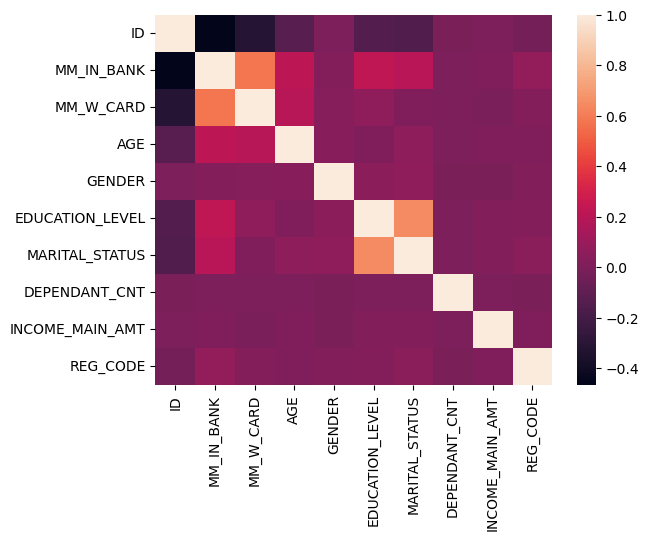

In [83]:
sns.heatmap(df2.corr())

<Axes: xlabel='EDUCATION_LEVEL', ylabel='INCOME_MAIN_AMT'>

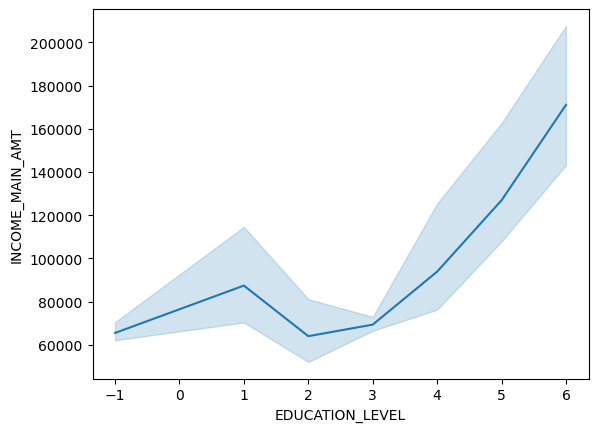

In [84]:
sns.lineplot(data=df2, x="EDUCATION_LEVEL", y="INCOME_MAIN_AMT")

In [85]:
df2 = df2.dropna()

Объединенние датафреймов

In [86]:
clean_data = pd.merge(df, df2, left_on='ID', right_on='ID')

In [95]:
clean_data.shape

(485302, 13)

In [87]:
clean_data.head()

,ID,PROD_TYPE,MCC_CODE,SUM_TRANS,index,MM_IN_BANK,MM_W_CARD,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,DEPENDANT_CNT,INCOME_MAIN_AMT,REG_CODE
0,500000000004725733,1,5411,119.24,681029,149,5,43,2,-1,3,0,102000.0,79.0
1,500000000004725733,1,5912,550.00,681029,149,5,43,2,-1,3,0,102000.0,79.0
2,500000000004725733,1,4131,34.00,680000,149,5,43,2,-1,3,0,102000.0,79.0
3,500000000004725733,1,4812,1989.00,681029,149,5,43,2,-1,3,0,102000.0,79.0
4,500000000004725733,2,5812,4750.00,692871,149,5,43,2,-1,3,0,102000.0,79.0


In [88]:
clean_data.drop("ID", axis = 1, inplace=True)

In [89]:
# clean_data.to_csv("data.csv", index = True)

In [90]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485302 entries, 0 to 485301
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PROD_TYPE        485302 non-null  int64  
 1   MCC_CODE         485302 non-null  int64  
 2   SUM_TRANS        485302 non-null  float64
 3   index            485302 non-null  int64  
 4   MM_IN_BANK       485302 non-null  int64  
 5   MM_W_CARD        485302 non-null  int64  
 6   AGE              485302 non-null  int64  
 7   GENDER           485302 non-null  int64  
 8   EDUCATION_LEVEL  485302 non-null  int64  
 9   MARITAL_STATUS   485302 non-null  int64  
 10  DEPENDANT_CNT    485302 non-null  int64  
 11  INCOME_MAIN_AMT  485302 non-null  float64
 12  REG_CODE         485302 non-null  float64
dtypes: float64(3), int64(10)
memory usage: 51.8 MB


In [91]:
clean_data.head()

,PROD_TYPE,MCC_CODE,SUM_TRANS,index,MM_IN_BANK,MM_W_CARD,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,DEPENDANT_CNT,INCOME_MAIN_AMT,REG_CODE
0,1,5411,119.24,681029,149,5,43,2,-1,3,0,102000.0,79.0
1,1,5912,550.00,681029,149,5,43,2,-1,3,0,102000.0,79.0
2,1,4131,34.00,680000,149,5,43,2,-1,3,0,102000.0,79.0
3,1,4812,1989.00,681029,149,5,43,2,-1,3,0,102000.0,79.0
4,2,5812,4750.00,692871,149,5,43,2,-1,3,0,102000.0,79.0


In [92]:
clean_data["REG_CODE"] = clean_data['REG_CODE'].astype('int64')

In [93]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485302 entries, 0 to 485301
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PROD_TYPE        485302 non-null  int64  
 1   MCC_CODE         485302 non-null  int64  
 2   SUM_TRANS        485302 non-null  float64
 3   index            485302 non-null  int64  
 4   MM_IN_BANK       485302 non-null  int64  
 5   MM_W_CARD        485302 non-null  int64  
 6   AGE              485302 non-null  int64  
 7   GENDER           485302 non-null  int64  
 8   EDUCATION_LEVEL  485302 non-null  int64  
 9   MARITAL_STATUS   485302 non-null  int64  
 10  DEPENDANT_CNT    485302 non-null  int64  
 11  INCOME_MAIN_AMT  485302 non-null  float64
 12  REG_CODE         485302 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 51.8 MB


In [96]:
clean_data['INCOME_MAIN_AMT'] = clean_data['INCOME_MAIN_AMT'].astype('int64')

In [97]:
clean_data['SUM_TRANS'] = clean_data['SUM_TRANS'].astype('int64')

In [98]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485302 entries, 0 to 485301
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   PROD_TYPE        485302 non-null  int64
 1   MCC_CODE         485302 non-null  int64
 2   SUM_TRANS        485302 non-null  int64
 3   index            485302 non-null  int64
 4   MM_IN_BANK       485302 non-null  int64
 5   MM_W_CARD        485302 non-null  int64
 6   AGE              485302 non-null  int64
 7   GENDER           485302 non-null  int64
 8   EDUCATION_LEVEL  485302 non-null  int64
 9   MARITAL_STATUS   485302 non-null  int64
 10  DEPENDANT_CNT    485302 non-null  int64
 11  INCOME_MAIN_AMT  485302 non-null  int64
 12  REG_CODE         485302 non-null  int64
dtypes: int64(13)
memory usage: 51.8 MB


# 2 Часть

In [119]:
from IPython.core.pylabtools import figsize

Text(0.5, 1.0, 'building Age Distribution')

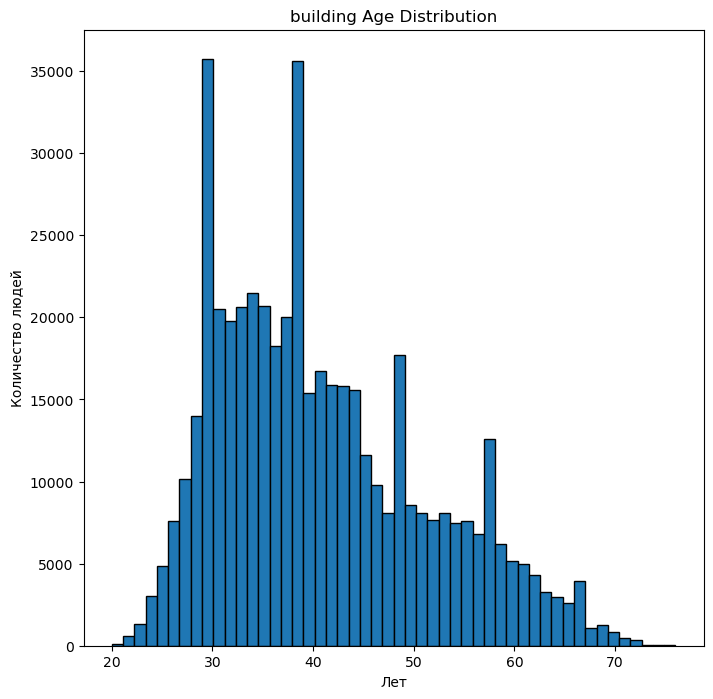

In [121]:
figsize(8, 8)
plt.hist(clean_data['AGE'].dropna(), bins = 50,edgecolor = 'k');
plt.xlabel('Лет')
plt.ylabel('Количество людей')
plt.title('building Age Distribution')

In [122]:
clean_data.corr()

,PROD_TYPE,MCC_CODE,SUM_TRANS,index,MM_IN_BANK,MM_W_CARD,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,DEPENDANT_CNT,INCOME_MAIN_AMT,REG_CODE
PROD_TYPE,1.000000,0.021201,0.005223,-0.003823,-0.296766,-0.256270,-0.036569,-0.008490,-0.152987,-0.138860,-0.004846,-0.000733,-0.053242
MCC_CODE,0.021201,1.000000,0.013732,0.124963,0.005052,0.000240,0.003444,0.005801,0.009381,0.009001,-0.000073,0.001449,0.009594
SUM_TRANS,0.005223,0.013732,1.000000,-0.017957,0.023719,0.002673,0.011298,-0.009526,0.027360,0.015420,-0.000505,0.005257,-0.008872
index,-0.003823,0.124963,-0.017957,1.000000,0.069506,0.012378,0.069713,0.071273,0.008603,0.093574,-0.003721,0.000535,0.231042
MM_IN_BANK,-0.296766,0.005052,0.023719,0.069506,1.000000,0.415986,0.233055,0.092322,0.248890,0.164824,-0.001954,0.015521,0.101677
MM_W_CARD,-0.256270,0.000240,0.002673,0.012378,0.415986,1.000000,0.163015,0.065639,0.147184,0.045311,0.001632,-0.007505,0.022370
AGE,-0.036569,0.003444,0.011298,0.069713,0.233055,0.163015,1.000000,0.062885,0.074622,0.161751,0.001270,0.006508,0.046558
GENDER,-0.008490,0.005801,-0.009526,0.071273,0.092322,0.065639,0.062885,1.000000,0.064013,0.072784,-0.003217,-0.003930,0.037198
EDUCATION_LEVEL,-0.152987,0.009381,0.027360,0.008603,0.248890,0.147184,0.074622,0.064013,1.000000,0.494077,0.002534,0.024354,0.029530
MARITAL_STATUS,-0.138860,0.009001,0.015420,0.093574,0.164824,0.045311,0.161751,0.072784,0.494077,1.000000,0.002686,0.020700,0.058071


<Axes: >

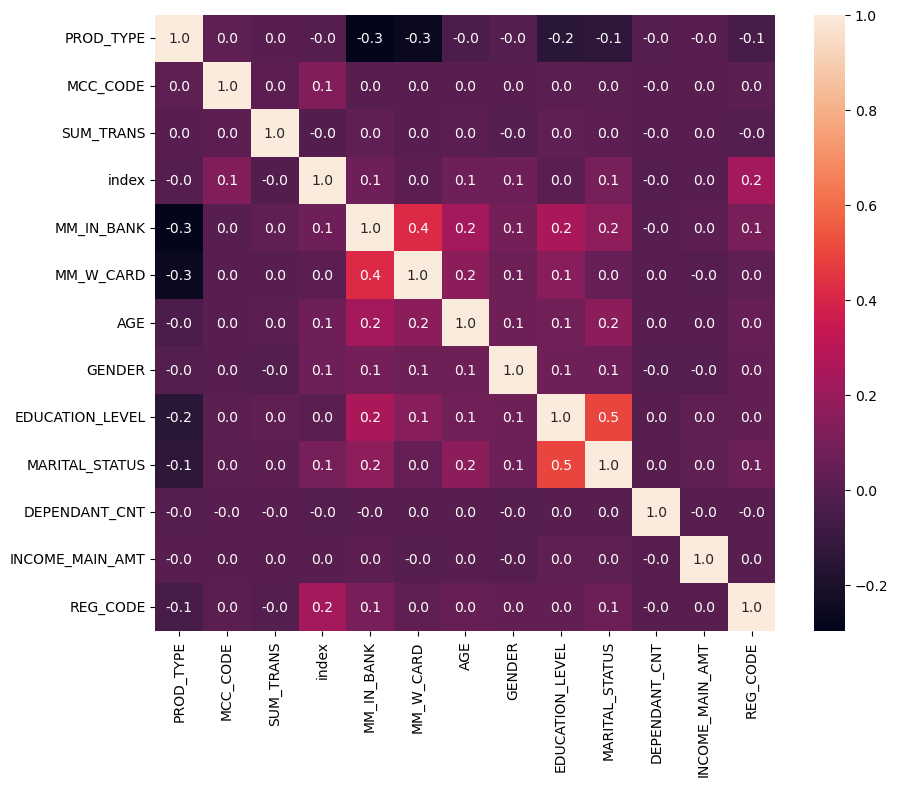

In [125]:
plt.figure(figsize(10,8))
sns.heatmap(clean_data.corr(), annot = True, fmt = ".1f")

In [126]:
df_new = clean_data

In [129]:
x = df_new.drop('AGE', axis = 1)
y = df_new["AGE"]

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [138]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [134]:
pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 7.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [159]:
from sklearn.preprocessing import StandardScaler

In [160]:
scal = StandardScaler()

In [161]:
data_scal = scal.fit_transform(df_new.drop("AGE", axis = 1))

In [162]:
pd.DataFrame(data_scal, columns = df_new.drop("AGE", axis = 1).columns)

,PROD_TYPE,MCC_CODE,SUM_TRANS,index,MM_IN_BANK,MM_W_CARD,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,DEPENDANT_CNT,INCOME_MAIN_AMT,REG_CODE
0,-1.505683,-0.234397,-0.251768,1.410618,1.450319,-0.572156,0.997687,-1.178606,0.818744,-0.003313,0.004045,1.381939
1,-1.505683,0.589551,-0.158177,1.410618,1.450319,-0.572156,0.997687,-1.178606,0.818744,-0.003313,0.004045,1.381939
2,-1.505683,-2.339495,-0.270225,1.405858,1.450319,-0.572156,0.997687,-1.178606,0.818744,-0.003313,0.004045,1.381939
3,-1.505683,-1.219517,0.154299,1.410618,1.450319,-0.572156,0.997687,-1.178606,0.818744,-0.003313,0.004045,1.381939
4,0.664150,0.425090,0.753845,1.465395,1.450319,-0.572156,0.997687,-1.178606,0.818744,-0.003313,0.004045,1.381939
...,...,...,...,...,...,...,...,...,...,...,...,...
485297,0.664150,-1.216228,1.459577,-1.195404,-0.425274,-0.572156,-1.002319,-0.398667,0.818744,-0.003036,-0.061688,1.039076
485298,0.664150,-1.216228,-0.190749,-1.234727,1.075201,2.659754,0.997687,1.161212,-0.258567,-0.003313,0.087706,-0.675235
485299,0.664150,-1.216228,-0.234179,-1.168538,2.346436,0.294942,0.997687,1.161212,1.357399,-0.003036,0.984065,0.781930
485300,0.664150,-1.216228,0.373836,-1.234727,0.366643,-0.703534,0.997687,-0.398667,0.818744,-0.003313,-0.033516,0.010490


In [163]:
data_scal

array([[-1.50568287, -0.23439741, -0.25176789, ..., -0.00331318,
         0.00404532,  1.38193863],
       [-1.50568287,  0.58955092, -0.15817704, ..., -0.00331318,
         0.00404532,  1.38193863],
       [-1.50568287, -2.33949493, -0.27022549, ..., -0.00331318,
         0.00404532,  1.38193863],
       ...,
       [ 0.66415048, -1.21622805, -0.23417889, ..., -0.00303552,
         0.98406472,  0.78192978],
       [ 0.66415048, -1.21622805,  0.3738359 , ..., -0.00331318,
        -0.0335164 ,  0.01048982],
       [-1.50568287, -1.21622805, -0.25589371, ..., -0.00331318,
        -0.05912666, -0.50380348]])

In [165]:
x = data_scal.copy()
y = clean_data["AGE"]

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1, stratify = y)


In [168]:
from sklearn.tree import DecisionTreeClassifier

In [169]:
clf= DecisionTreeClassifier(random_state = 1)


In [170]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [171]:
clf.score(x_test, y_test)

0.9728692020797989

In [172]:
y_test[:5]

302687    39
101613    33
35634     43
68578     28
18238     41
Name: AGE, dtype: int64

In [173]:
y_pred = clf.predict(x_test)
y_pred[:10]

array([39, 33, 43, 28, 41, 40, 46, 30, 33, 55], dtype=int64)

In [174]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [175]:
accuracy_score(y_test, y_pred)

0.9728692020797989

In [176]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          20       1.00      1.00      1.00         7
          21       0.94      1.00      0.97        17
          22       0.97      0.99      0.98       170
          23       0.97      0.97      0.97       389
          24       0.98      0.97      0.97       900
          25       0.98      0.97      0.97      1459
          26       0.97      0.96      0.97      2283
          27       0.97      0.98      0.98      3049
          28       0.97      0.97      0.97      4207
          29       0.97      0.97      0.97      5131
          30       0.97      0.98      0.97      5590
          31       0.97      0.98      0.97      6154
          32       0.97      0.97      0.97      5929
          33       0.97      0.97      0.97      6181
          34       0.97      0.97      0.97      6443
          35       0.98      0.97      0.97      6216
          36       0.97      0.97      0.97      5479
          37       0.97    

<Axes: >

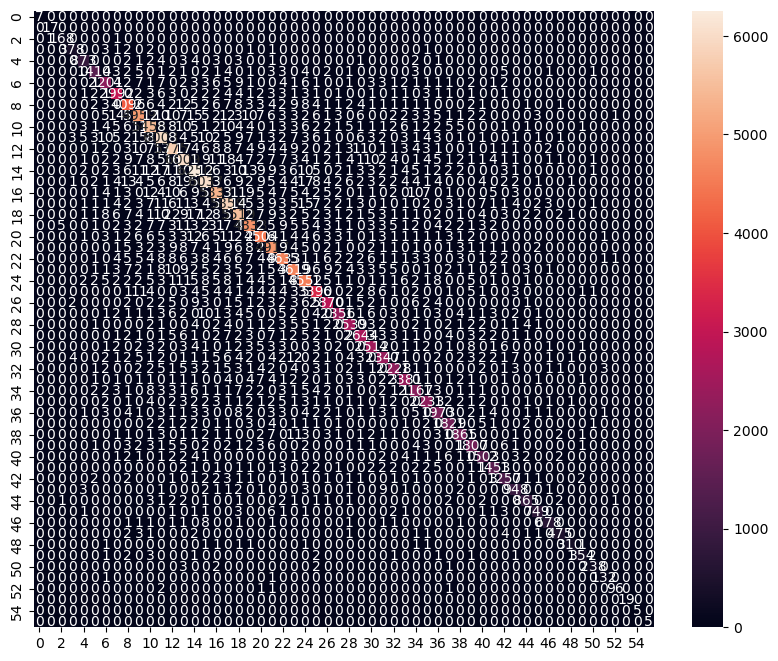

In [181]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = ".0f")

# 2/1

In [182]:
x = df_new.drop("EDUCATION_LEVEL", axis = 1)
y = df_new["EDUCATION_LEVEL"]

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [184]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)


In [190]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [191]:
from xgboost import XGBClassifier, plot_importance, plot_tree

In [192]:
xgb_cls = XGBClassifier(n_estimators = 50, learning_rate = 0.3, n_jobs = -1, random_state = 1)

In [193]:
xgb_cls.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [195]:
y_pred = xgb_cls.predict(x_test)

In [196]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00     47332
           0       0.00      0.00      0.00         0
           1       0.52      0.46      0.49     29920
           2       1.00      0.30      0.47       656
           3       0.85      0.10      0.18     11010
           4       0.85      0.14      0.23      6951
           5       0.58      0.83      0.68     47562
           6       0.99      0.17      0.29      2160

    accuracy                           0.39    145591
   macro avg       0.60      0.25      0.29    145591
weighted avg       0.42      0.39      0.35    145591



<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

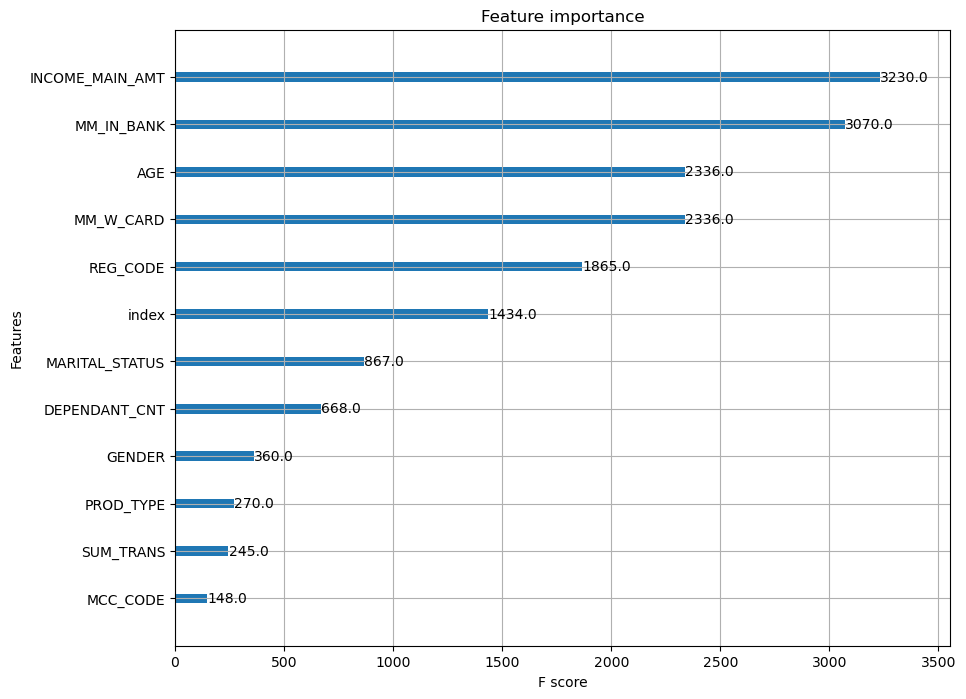

In [197]:
plot_importance(xgb_cls) # отбор признаков с помощью алгоритма

In [199]:
df_n = df_new.drop(["MCC_CODE", "SUM_TRANS"], axis = 1)
x = df_n.drop("INCOME_MAIN_AMT", axis = 1)
y = df_n["INCOME_MAIN_AMT"]

In [201]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
# Прогнозирование зарплаты

In [209]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [205]:
xgb_regr = XGBRegressor(n_estimators = 100, learning_rate = 0.1, n_jobs = -1, random_state = 1)

In [206]:
xgb_regr.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

In [207]:
y_pred = xgb_regr.predict(x_test)

In [210]:
np.sqrt(mean_squared_error(y_test, y_pred))

216754.46615945236

In [211]:
r2_score(y_test, y_pred)

0.9538226899854101